<a href="https://colab.research.google.com/github/zdanielshi/personal_projects/blob/main/RELY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Install yfinance

In [ ]:
pip install yfinance

Import libraries

In [ ]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

Define the start and end times. Start time is March 22, 2022, the end of the RELY lockup. End date is coded to today.

In [ ]:
start_date = '2022-03-22'
end_date = dt.date.today().strftime('%Y-%m-%d')

# Get returns for each comp

Define a function to get the return for each comp.

In [90]:
def get_stock(ticker):
  stock = yf.Ticker(ticker)
  stock_close = stock.history(interval='1d', start=start_date, end=end_date)['Close']
  stock_close = stock_close.tolist()

  live_price = stock.info['regularMarketPrice']
  stock_close.append(int(live_price))

  stock_returns = [] # initialize a returns list
  for i in stock_close: # iterate through the close list
    stock_returns.append((i / stock_close[0]) - 1)# calculate each value against the 0 index value, append to the returns list
  return stock_returns

Run the function for comps and indices.

In [94]:
rely_returns = get_stock('rely')
pypl_returns = get_stock('pypl')
sq_returns = get_stock('sq')
coin_returns = get_stock('coin')
ml_returns = get_stock('ml')
dave_returns = get_stock('dave')
nu_returns = get_stock('nu')
flyw_returns = get_stock('flyw')
payo_returns = get_stock('payo')
tost_returns = get_stock('tost')
sofi_returns = get_stock('sofi')
dlo_returns = get_stock('dlo')
hood_returns = get_stock('hood')
upst_returns = get_stock('upst')
gdot_returns = get_stock('gdot')
spy_returns = get_stock('spy')
nasdaq_100_returns = get_stock('^ndxt')


# Results

<function matplotlib.pyplot.show>

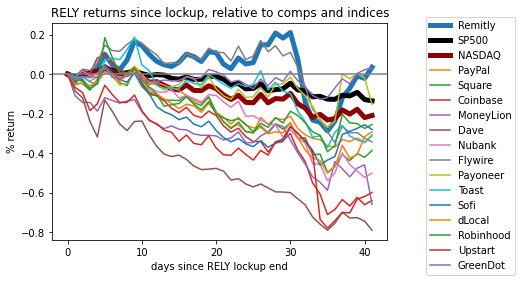

In [111]:
plt.plot(rely_returns, lw=5, label='Remitly')
plt.plot(spy_returns, lw=5, color='black', label='SP500')
plt.plot(nasdaq_100_returns, lw=5, color='darkred', label='NASDAQ')
plt.plot(pypl_returns, label='PayPal')
plt.plot(sq_returns, label='Square')
plt.plot(coin_returns, label='Coinbase')
plt.plot(ml_returns, label='MoneyLion')
plt.plot(dave_returns, label='Dave')
plt.plot(nu_returns, label='Nubank')
plt.plot(flyw_returns, label='Flywire')
plt.plot(payo_returns, label='Payoneer')
plt.plot(tost_returns, label='Toast')
plt.plot(sofi_returns, label='Sofi')
plt.plot(dlo_returns, label='dLocal')
plt.plot(hood_returns, label='Robinhood')
plt.plot(upst_returns, label='Upstart')
plt.plot(gdot_returns, label='GreenDot')

plt.title('RELY returns since lockup, relative to comps and indices')
plt.ylabel("% return")
plt.xlabel("days since RELY lockup end")
plt.axhline(y=0, color = 'gray')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show